In [1]:
import sys 
sys.path.append("..") 
import os
import pandas as pd
from utils import config

from sklearn.model_selection import train_test_split

# config.xls_path = '../Train-Data/Mix6_mainCat_20/pro_review.xlsx'
# config.xls_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_new/pro_review.xlsx'

# path = str(os.path.abspath(config.xls_path)).replace('Summarize_parallel','')
total_df = pd.read_excel(str(os.path.abspath(config.xls_path)).replace('Summarize_parallel',''))
# total_df = total_df[total_df['review_len']>=50]
# total_df = total_df[total_df['summary_len']>=5]
total_df = total_df.sort_values(by=['review_len','overlap'], ascending = False)
train_df, val_df = train_test_split(total_df, test_size=0.1, 
                                    random_state=0, shuffle=True)

print(len(total_df))
print(len(train_df))
print(len(val_df))

# train : 504075(90%),    test : 56009(10%) -> best 566084

774184
696765
77419


In [2]:
def longest_common_subsequence(main_string, comparing_string):

#     main_string = main_string.split(" ")
#     comparing_string = comparing_string.split(" ")
    columns_length = len(main_string)  # Get the length of the first word or base word
    rows_length = len(comparing_string)  # Get the length of the second word or comparing word

    # MAKE A 2D LIST (MATRIX)
    dynamic_table = [[0] * (columns_length + 1) for i in range(rows_length + 1)]

    # rows_length = NUMBER OF ROWS
    # columns_length = NUMBER OF COLUMNS
    
    # FILL THE MATRIX FOLLOWING LCS ALGORITHM.
    for i in range(1, rows_length + 1):
        for j in range(1, columns_length + 1):
            if main_string[j - 1] == comparing_string[i - 1]:
                dynamic_table[i][j] = 1 + dynamic_table[i - 1][j - 1]

            else:
                dynamic_table[i][j] = max(dynamic_table[i - 1][j], dynamic_table[i][j - 1])

#     print("MATRIX ACCORDING TO LONGEST COMMON SUBSEQUENCE ALGORITHM: \n ")

    # for i in range(rows_length + 1):
    #     print(dynamic_table[i])

    #print("LENGTH OF LONGEST COMMON SUBSEQUENCE = ", dynamic_table[rows_length][columns_length])

    len_lcs = dynamic_table[rows_length][columns_length]

    i = len(comparing_string)
    j = len(main_string)

    lcs_string = str()

    # BACKTRACKING TO FIND THE LONGEST COMMON SUBSEQUENCE

    temp = True

    while temp is True:
        if dynamic_table[i][j] == 0:
            temp = False
        elif dynamic_table[i][j] == dynamic_table[i][j - 1]:
            j = j - 1

        else:
            lcs_string = main_string[j-1] + " " + lcs_string
            i = i - 1
            j = j - 1

    return lcs_string, len_lcs

In [3]:
# df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

In [4]:
#%%
from tqdm import tqdm
from copy import deepcopy
def analay(df, mode):
#     df['token_lcs'] = 0
#     df['len_lcs'] = 0
#     df['percent_lcs'] = 0
#     df['overlap_pos'] = 0

#     df['reveiw_len'] = 0
#     df['summary_len'] = 0
#     df = df[:100]
    with tqdm(total=len(df)) as pbar:
        for i ,row in df.iterrows():       
            overlap_pos = None

#             rev, summary = row['review'], row['summary']
#             rev_tokens, summary_tokens = rev.split(" "), summary.split(" ")           
#             token_lcs, len_lcs = longest_common_subsequence(rev_tokens, summary_tokens)
#             percent_lcs = len_lcs / len(summary_tokens) * 100 # percent

#             rev_sents = rev.split(" . ")
#             overlap_sents = {idx: longest_common_subsequence(sent.split(" "), summary_tokens) for idx, sent in enumerate(rev_sents)}
#             sort_overlap_sent = {k:v for k,v in sorted(overlap_sents.items(), key= lambda item: item[1], reverse=True)}
#             overlap_sent_id = list(sort_overlap_sent.items())[0][0]

#             if (overlap_sent_id == 0) and (percent_lcs >= 20): overlap_pos = 0 # overlap_Top 
#             elif (overlap_sent_id == len(rev_tokens)-1) and (percent_lcs >= 20): overlap_pos = 1 # overlap_Final 
#             elif (percent_lcs >= 20): overlap_pos = 2 # overlap_other 
#             else: overlap_pos = -1 # no overlap 

#             df.loc[i,'token_lcs'] = token_lcs
#             df.loc[i,'len_lcs'] = len_lcs
#             df.loc[i,'percent_lcs'] = percent_lcs
#             df.loc[i,'overlap_pos'] = overlap_pos
            
#             df.loc[i,'reveiw_len'] = len(rev_tokens)
#             df.loc[i,'summary_len'] = len(summary_tokens)

            pbar.update(1)
#             pbar.set_description("%s row: %s | overlap_pos: %s (%2.2f)percent| len_lcs: %s" % (mode, i, overlap_pos, percent_lcs, len_lcs))
#     df = df[df['token_lcs']!=0]
    return df



In [35]:
train_df['review_len'].head()

485267    252
509713     56
609333    273
30782     226
279679     55
Name: review_len, dtype: int64

In [6]:
train_df.head()

,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,cheat_num,...,DEP_keys,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity,summary_check
485267,1454457600,5,10,positive,Oh my goodness. I am an avid runner. Having ru...,BY FAR THE BEST REFLECTIVE VEST I HAVE TRIED -...,oh my goodness . i be an avid runner . have ru...,<s> by far the best reflective vest i have try...,"{'have', 'be', 'of', 'best', 'avid', 'runner',...",10,...,[],"['runner', 'avid', 'use', 'number', 'relay', '...",[],9,52.941176,2,i have of i be be be runner runner,0.450000,0.766667,12
509713,1411257600,5,3,positive,Put this inside my summer bag as a liner and i...,So glad I had this liner,put this inside my summer bag as a liner and i...,<s> so glad i have this liner </s>,"{'have', 'liner', 'so', 'glad', 'i'}",5,...,[],"['summer', 'difference', 'bag', 'liner', 'huge...",[],6,75.000000,0,so glad i have this liner,0.500000,1.000000,5
609333,1476835200,4,2,positive,Bought this phone for my father to replace his...,"Easy to see, easy to use",buy this phone for my father to replace his ol...,<s> easy to see of easy to use </s>,"{'to', 'easy', 'use', 'of'}",4,...,[],"['father', 'nokia', 'phone', 'old', 'phone', '...",[],6,66.666667,2,to of easy to to use,0.433333,0.833333,5
30782,1135987200,5,3,positive,Let me begin by saying: I am not a professiona...,Great for the price I paid,let me begin by say of i be not a professional...,<s> great for the price i pay </s>,"{'i', 'pay', 'for', 'great'}",4,...,[],"['term', 'gher', 'review', 'photogram', 'greek...",[],3,37.500000,-1,i i pay,0.800000,0.750000,5
279679,1391299200,5,2,positive,"Unit was easy to set up, and does what is says...",I own another Philips TV and have been very pl...,unit be easy to set up of and do what be say i...,<s> i own another philip tv and have be very p...,"{'with', 'have', 'be', 'tv', 'it', 'i'}",6,...,[],"['format', 'netflix', 'connection', 'pc', 'scr...",[],4,28.571429,-1,be be it it,0.625000,1.000000,8


In [7]:
val_df.head()

,review_ID,rating,vote,binaryrating,orign_review,orign_summary,review,summary,cheat,cheat_num,...,DEP_keys,Noun_adj_keys,TextRank_keys,len_lcs,percent_lcs,overlap_pos,token_lcs,summary_polarity,summary_subjectivity,summary_check
515316,1342569600,3,4,negative,THe perfect chair for motorcycle travel and ju...,super small and comfy but they do break,the perfect chair for motorcycle travel and ju...,<s> super small and comfy but they do break </s>,"{'break', 'do', 'small'}",3,...,[],"['chair', 'perfect', 'light', 'small', 'leg', ...",[],4,40.000000,-1,and and break break,0.041667,0.533333,6
80402,1344470400,5,5,positive,I'll start off by saying that I am an amateur ...,Great lens at a great price,i will start off by say that i be an amateur p...,<s> great lens at a great price </s>,"{'price', 'great', 'a', 'at', 'lens'}",5,...,[],"['photo', 'lot', 'lens', 'camera', 'whole', 't...",[],5,62.500000,2,lens a great a price,0.800000,0.750000,5
83320,1231718400,5,2,positive,Plays Blue Ray discs beartifully and is simple...,You're gonna love your old DVD's.,play blue ray disc be a rt i fully and be simp...,<s> you be gon na love your old dvd be </s>,"{'be', 'old', 'dvd'}",3,...,[],"['rt', 'ray', 'blue', 'disc', 'simple', 'surpr...",[],5,45.454545,-1,be your old dvd be,0.300000,0.400000,6
650017,1039824000,2,23,negative,I finally killed my $79 Costco cross-cut shred...,"Small, flimsy construction, under-powered, no ...",i finally kill my of costco cross of cut shred...,<s> small of flimsy construction of under of p...,"{'of', 'flimsy', 'under'}",3,...,[],"['machine', 'review', 'good', 'much', 'paper',...",[],6,46.153846,-1,of of of of of of,-0.250000,0.400000,8
232896,1520985600,2,4,negative,"The length of the tripod is quite short, 14"", ...",Pro: short when folded; Con: shaky when extended.,the length of the tripod be quite short of and...,<s> pro of short when fold of con of shaky whe...,"{'of', 'short', 'extend', 'shaky'}",4,...,[],"['tripod', 'length', 'short', 'sorry', 'positi...",[],6,46.153846,-1,of short of of when extend,-0.166667,0.400000,7


In [8]:
import os
import matplotlib.pyplot as plt


# print(str(os.path.abspath('train_df.xlsx')))
if os.path.exists('train_df.xlsx'):
    print('True')
    p_train_df = pd.read_excel('train_df.xlsx')
    p_val_df = pd.read_excel('val_df.xlsx')
else:    
    p_train_df = analay(deepcopy(train_df), 'train')
    p_train_df.to_excel('train_df.xlsx', encoding='utf8')

    p_val_df = analay(deepcopy(val_df), 'test')
    p_val_df.to_excel('val_df.xlsx', encoding='utf8')

True


In [9]:
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)
# p_train_df['review_ID'] = p_train_df.review_ID.astype(str)

# p_train_df.describe()

p_train_df.columns

Index(['review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check'],
      dtype='object')

count    696765.000000
mean        197.815905
std         157.865660
min          25.000000
25%          91.000000
50%         144.000000
75%         244.000000
max        1000.000000
Name: review_len, dtype: float64
review_len > 500 : 41702


Text(0.5, 1.0, 'review_len Analysis')

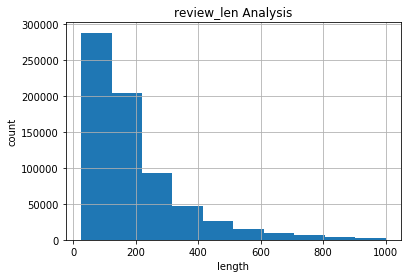

In [10]:
hist = p_train_df['review_len'].hist(bins=10)
s = p_train_df['review_len'].describe(); print(s)
# print('reveiw_len <= 20 :',len(p_train_df[p_train_df['reveiw_len']<=20]))
print('review_len > 500 :',len(p_train_df[p_train_df['review_len']>500])) # # max pos, max_enc_steps 
plt.ylabel('count')
plt.xlabel('length')

plt.title('review_len Analysis')

summary_len > 20 : 13910
count    696765.000000
mean         11.798081
std           3.280538
min           6.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          22.000000
Name: summary_len, dtype: float64


Text(0.5, 1.0, 'summary_len Analysis')

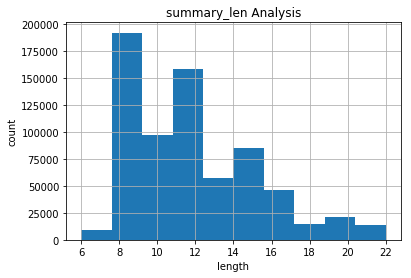

In [11]:
print('summary_len > 20 :',len(p_train_df[p_train_df['summary_len']>20]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps
hist = p_train_df['summary_len'].hist(bins=10)
s = p_train_df['summary_len'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('length')
plt.title('summary_len Analysis')

# Rating

Text(0.5, 1.0, 'Rating')

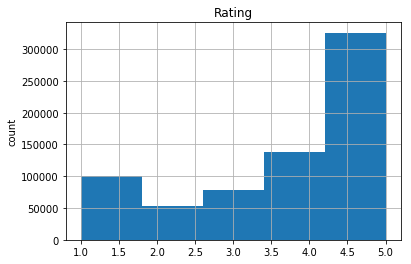

In [12]:
hist = p_train_df['rating'].hist(bins=5)
# s = p_train_df['vote'].describe(); print(s)
plt.ylabel('count')
plt.title('Rating')

# sentiment

summary_polarity and summary_subjectivity  > 0 : 602355
count    696765.000000
mean          0.614706
std           0.220207
min           0.022222
25%           0.466667
50%           0.600000
75%           0.750000
max           1.000000
Name: summary_subjectivity, dtype: float64


Text(0.5, 1.0, 'summary_subjectivity')

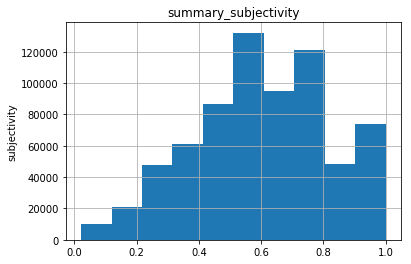

In [13]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_subjectivity'].hist(bins=10)
s = p_train_df['summary_subjectivity'].describe(); print(s)
plt.ylabel('subjectivity')
plt.title('summary_subjectivity')

summary_polarity and summary_subjectivity  > 0 : 602355
count    696765.000000
mean          0.345043
std           0.404639
min          -1.000000
25%           0.133333
50%           0.400000
75%           0.650000
max           1.000000
Name: summary_polarity, dtype: float64


Text(0.5, 1.0, 'summary_polarity')

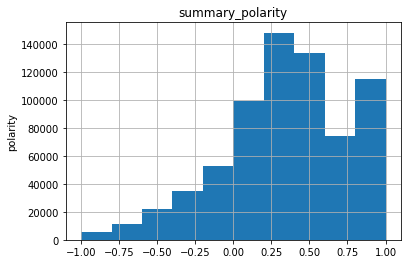

In [14]:
print('summary_polarity and summary_subjectivity  > 0 :',len(p_train_df[
    (abs(p_train_df['summary_polarity'])>0.1) &
    (p_train_df['summary_subjectivity']>0.25)

]))  # max_dec_steps
# print('summary_len <= 5 :',len(p_train_df[p_train_df['summary_len']<6])) # min_dec_steps

hist = p_train_df['summary_polarity'].hist(bins=10)
s = p_train_df['summary_polarity'].describe(); print(s)
plt.ylabel('polarity')
plt.title('summary_polarity')

# POS_Keyword

In [15]:
p_train_df['len_Pos_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Pos_keys'] = p_train_df['POS_keys'].apply(f)
p_train_df[['POS_keys','len_Pos_keys']].head()
p_train_df[['POS_keys','len_Pos_keys']].describe()

,len_Pos_keys
count,696765.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [16]:
print(len(p_train_df[p_train_df['len_Pos_keys']<=5]))

696765


# DEP_Keyword

In [17]:
p_train_df['len_DEP_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_DEP_keys'] = p_train_df['DEP_keys'].apply(f)
p_train_df[['DEP_keys','len_DEP_keys']].head()
p_train_df[['DEP_keys','len_DEP_keys']].describe()

,len_DEP_keys
count,696765.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Noun_adj_keys

In [18]:
p_train_df['len_Noun_adj_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_Noun_adj_keys'] = p_train_df['Noun_adj_keys'].apply(f)
p_train_df[['Noun_adj_keys','len_Noun_adj_keys']].head()
p_train_df[['Noun_adj_keys','len_Noun_adj_keys']].describe()

,len_Noun_adj_keys
count,696765.000000
mean,33.557743
std,29.950038
min,0.000000
25%,14.000000
50%,24.000000
75%,42.000000
max,333.000000


In [19]:
print(len(p_train_df[p_train_df['len_Noun_adj_keys']<=5]))

24075


# TextRank_Keyword

In [20]:
p_train_df.columns

Index(['review_ID', 'rating', 'vote', 'binaryrating', 'orign_review',
       'orign_summary', 'review', 'summary', 'cheat', 'cheat_num', 'overlap',
       'review_len', 'summary_len', 'POS_keys', 'DEP_keys', 'Noun_adj_keys',
       'TextRank_keys', 'len_lcs', 'percent_lcs', 'overlap_pos', 'token_lcs',
       'summary_polarity', 'summary_subjectivity', 'summary_check',
       'len_Pos_keys', 'len_DEP_keys', 'len_Noun_adj_keys'],
      dtype='object')

In [21]:
p_train_df['len_TextRank_keys'] = 0
f = lambda x: len(eval(x))
p_train_df['len_TextRank_keys'] = p_train_df['TextRank_keys'].apply(f)
p_train_df[['TextRank_keys','len_TextRank_keys']].head()
p_train_df[['TextRank_keys','len_TextRank_keys']].describe()

,len_TextRank_keys
count,696765.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [22]:
print(len(p_train_df[p_train_df['len_TextRank_keys']<=1]))

696765


# Prune data length

In [23]:
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_train_df[
    (p_train_df['percent_lcs']>=25) & (p_train_df['review_len']>=50) &(p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>=0.1) &
    (p_train_df['summary_subjectivity']>=0.1)  &
    (p_train_df['overlap_pos']!=0)
#     (not((p_train_df['overlap_pos']==0) & (p_train_df['percent_lcs']>50)))
#     (p_train_df['len_TextRank_keys']>0) 
#     (p_train_df['len_DEP_keys']>5) & 
#     (p_train_df['len_Pos_keys']>5)
                                        ]))
print('review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 : ',len(p_val_df[
    (p_val_df['review_len']>=50) &(p_val_df['review_len']<=500) & (p_val_df['summary_len']<=20) &
    (abs(p_val_df['summary_polarity'])>=0.1) &
    (p_val_df['summary_subjectivity']>=0.1) & (p_val_df['overlap_pos']!=0)    
                                        ]))

# # first_acc = 0.325
min_df = p_train_df[
    (p_train_df['review_len']<=500) & (p_train_df['summary_len']<=20) &
    (abs(p_train_df['summary_polarity'])>=0.1) &
    (p_train_df['summary_subjectivity']>=0.1)    
                                        ]

# print('reveiw_len > 7000 :',len(p_train_df[p_train_df['reveiw_len']>=700])) # # max pos, max_enc_steps 
# s = p_train_df['reveiw_len'].describe(); print(s)
# s = s.drop(labels = ['count'])
# s.plot.bar()
# plt.ylabel('length')
# plt.title('reveiw_len')
# plt.show()

review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  491430
review_len <= 500 and summary_len<= 20 and summary_polarity > 0.1 and summary_subjectivity > 0.25 :  58330


# cheat_num

count    594784.000000
mean          5.785162
std           2.760313
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: cheat_num, dtype: float64


Text(0.5, 1.0, 'cheat_num')

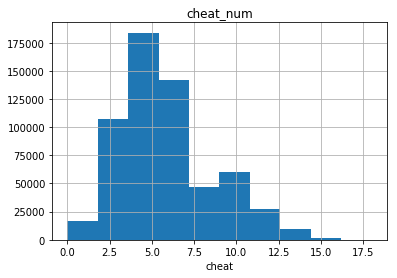

In [24]:
hist = min_df['cheat_num'].hist(bins=10)
s = min_df['cheat_num'].describe(); print(s)
plt.xlabel('cheat')
plt.title('cheat_num')

# summary_check

In [25]:
# s = min_df['summary_check'].describe(); print(s) # for tricky

# hist = min_df['summary_check'].hist(bins=10)
# s = min_df['summary_check'].describe(); print(s)
# plt.xlabel('polarity')
# plt.title('summary_polarity')

# percent_lcs EDA(20 divided)

count    594784.000000
mean         53.918920
std          20.915612
min           0.000000
25%          37.500000
50%          50.000000
75%          72.727273
max          90.000000
Name: percent_lcs, dtype: float64


Text(0.5, 1.0, 'percent_lcs')

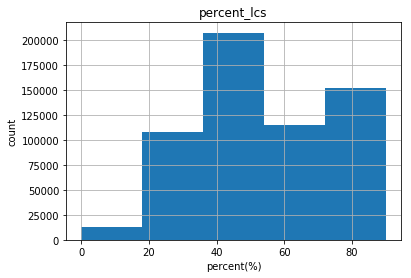

In [26]:
hist = min_df['percent_lcs'].hist(bins=5)
s = min_df['percent_lcs'].describe(); print(s)
plt.ylabel('count')
plt.xlabel('percent(%)')
plt.title('percent_lcs')

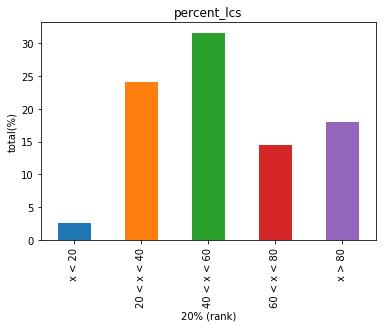

In [27]:
# 统计学上的四分为函数
# 原则上p是可以取0到1之间的任意值的。但是有一个四分位数是p分位数中较为有名的。

# 所谓四分位数；即把数值由小到大排列并分成四等份，处于三个分割点位置的数值就是四分位数。

# 第1四分位数 (Q1)，又称“较小四分位数”，等于该样本中所有数值由小到大排列后第25%的数字。
# 第2四分位数 (Q2)，又称“中位数”，等于该样本中所有数值由小到大排列后第50%的数字。
# 第3四分位数 (Q3)，又称“较大四分位数”，等于该样本中所有数值由小到大排列后第75%的数字。
# 第3四分位数与第1四分位数的差距又称四分位距（InterQuartile Range,IQR）

s = pd.Series({'x < 20':len(min_df[min_df['percent_lcs']<20])/len(min_df)*100, 
           '20 < x < 40':len(min_df[(min_df['percent_lcs']>20) & (min_df['percent_lcs']<40)])/len(min_df)*100, 
           '40 < x < 60':len(min_df[(min_df['percent_lcs']>40) & (min_df['percent_lcs']<60)])/len(min_df)*100, 
           '60 < x < 80':len(min_df[(min_df['percent_lcs']>60) & (min_df['percent_lcs']<80)])/len(min_df)*100, 
           'x > 80':len(min_df[min_df['percent_lcs']>80])/len(min_df)*100          
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('20% (rank)')
plt.title('percent_lcs')
plt.show()

overlap Top :11.70 %
overlap Final :0.00 %
overlap Other Pos :44.44 %
No overlap :43.86 %


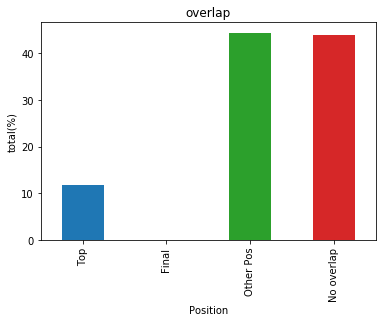

In [28]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

# print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
# print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

# s = pd.Series({'Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
#            'Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
#            'Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
#            'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
#           })


print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) ])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) ])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) ])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['overlap_pos']==-1)])/len(min_df)*100),'%') 

s = pd.Series({'Top':len(min_df[(min_df['overlap_pos'] == 0) ])/len(min_df)*100, 
           'Final':len(min_df[(min_df['overlap_pos'] == 1) ])/len(min_df)*100,      
           'Other Pos':len(min_df[(min_df['overlap_pos'] == 2) ])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['overlap_pos']==-1)])/len(min_df)*100,  
          })

s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('Position')
plt.title('overlap')
plt.show()

# Ext/Abs分界(50)

percent_lcs x > 50  46.93 %
percent_lcs x <= 50  53.07 %


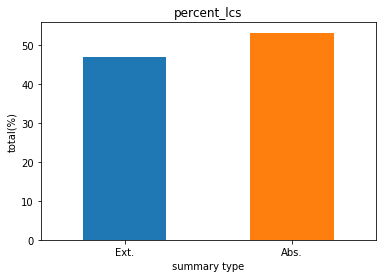

In [29]:
print('percent_lcs x > 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100),'%')  # max_dec_steps
print('percent_lcs x <= 50  %2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%')  # max_dec_steps

s = pd.Series({'Ext.':len(min_df[(min_df['percent_lcs']>50)])/len(min_df)*100, 
           'Abs.':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,      
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.xlabel('summary type')
plt.title('percent_lcs')
plt.xticks(rotation=0)
plt.show()

overlap Top :10.10 %
overlap Final :0.00 %
overlap Other Pos :36.84 %
No overlap :53.07 %


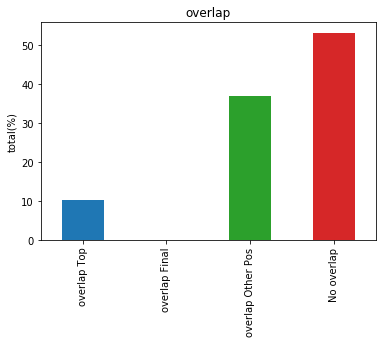

In [30]:
'''
overlap => percent_lcs > (50% summary len)
overlap_pos : 0 Top
overlap_pos : 1 Final
overlap_pos : 2 Other Pos
overlap_pos : -1 No overlap
'''

print('overlap Top :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Final :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('overlap Other Pos :%2.2f'% float(len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100),'%') 
print('No overlap :%2.2f'% float(len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100),'%') 

s = pd.Series({'overlap Top':len(min_df[(min_df['overlap_pos'] == 0) & (min_df['percent_lcs']>50)])/len(min_df)*100, 
           'overlap Final':len(min_df[(min_df['overlap_pos'] == 1) & (min_df['percent_lcs']>50)])/len(min_df)*100,      
           'overlap Other Pos':len(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)])/len(min_df)*100,  
           'No overlap':len(min_df[(min_df['percent_lcs']<=50)])/len(min_df)*100,  
          })
s.plot.bar()
plt.ylabel('total(%)')
plt.title('overlap')
plt.show()

In [31]:
def view(df, condition, view_num=10):
    package_dict = []
    for i in range(view_num):
        d1 = dict(min_df[eval(condition)].iloc[i])
        d2 = {'review':d1['review'],
              'summary':d1['summary'],
              'summary_subjectivity':d1['summary_subjectivity'],
              'summary_polarity':d1['summary_polarity'],
#               'token_lcs':d1['token_lcs'],
#               'overlap':d1['overlap'],
#               'percent_lcs':d1['percent_lcs'],
              'keywords':d1['POS_keys']            
             }
        package_dict.append(d2)
    return package_dict
        
# view(min_df, "(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']<50)")
view(min_df, "(min_df['review_len']<=50) & (min_df['percent_lcs']<=40) & (min_df['summary_len']>=15) & (min_df['summary_subjectivity']>=0.1)")



[{'review': 'of i have no idea how good it be . i put the wrong bolt in because the direction suck of and i do not see that there be four bolt in the box . now i can not get it out . check out my video .',
  'summary': '<s> make sure you have all the bolt and part in front of you before you start </s>',
  'summary_subjectivity': 0.8888888888888888,
  'summary_polarity': 0.5,
  'keywords': '[]'},
 {'review': 'i dislike the instruction regard water and excavator mixing of it be too watery and take a long time to dry i use lb and it take around day to fully dry of but it be worth it . repeat i suggest add a bit less water than indicate .',
  'summary': '<s> good product and well worth the price i pay thanks amazon of repeat </s>',
  'summary_subjectivity': 0.3,
  'summary_polarity': 0.4,
  'keywords': '[]'},
 {'review': 'i use this about time of then the af stop work of the contact pin be all stick and would not come out towards the lens so it make no contact with the lens of it be a big 

In [32]:
dict(min_df[(min_df['overlap_pos'] == 2) & (min_df['percent_lcs']>50)].iloc[0:10])['summary']

485267    <s> by far the best reflective vest i have try...
609333                  <s> easy to see of easy to use </s>
767773    <s> i have order the twice now and love them o...
230160    <s> holy crap this thing be nice of repeated </s>
391521    <s> i buy this mirror because the guy who have...
26176     <s> trendnet of etg be a great addition to a c...
226646    <s> i have an iphone of and it fit easily in t...
246566       <s> and it beautiful right out of the box </s>
160192          <s> great case for the canon powershot </s>
538841    <s> the picture display the item in a chrome l...
Name: summary, dtype: object

In [33]:
# review_path = '/home/eagleuser/Users/leyan/Train-Data/Mix6_mainCat_Ekphrasis/review.xlsx'
# df = pd.read_excel(review_path)

In [34]:
df.columns

NameError: name 'df' is not defined

In [ ]:
# df[(df['review_ID']==1497744000) & (df['lemm_review_len']==74)]

df[(df['lemm_review_len']<=70)][['review','summary','lemm_review_len']].iloc[0]['review']

In [ ]:
df[(df['lemm_review_len']<=70)][['review','summary','review_ID']].iloc[0]['review_ID']

In [ ]:
min_df.columns

In [ ]:
min_df[(min_df['review_len']==58) & (min_df['review_ID']==1174089600)].iloc[0]['review']

In [ ]:
min_df[(min_df['review_len']==58) & (min_df['review_ID']==1174089600)].iloc[0]['summary']

In [ ]:
min_df[(min_df['review_len']==58) & (min_df['review_ID']==1174089600)].iloc[0]['percent_lcs']

In [ ]:
min_df[(min_df['review_len']==58) & (min_df['review_ID']==1174089600)].iloc[0]['Noun_adj_keys']

In [ ]:
['background', 'mic', 'quality', 'i', 'river', 'noise', 'player', 'computer']